# Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Import Dataset

In [12]:
df = pd.read_csv('dataset/Mall_Customers.csv')

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Examine General Information of the Dataset

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Null Data Check

In [14]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#  Visualizing Gender Distribution

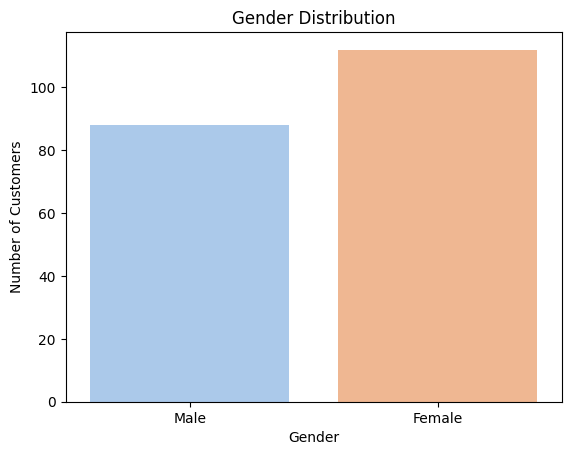

In [15]:
sns.countplot(x=df["Genre"], palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.savefig("images/gender_distribution.png")
plt.show()

# Age Distribution Histogram

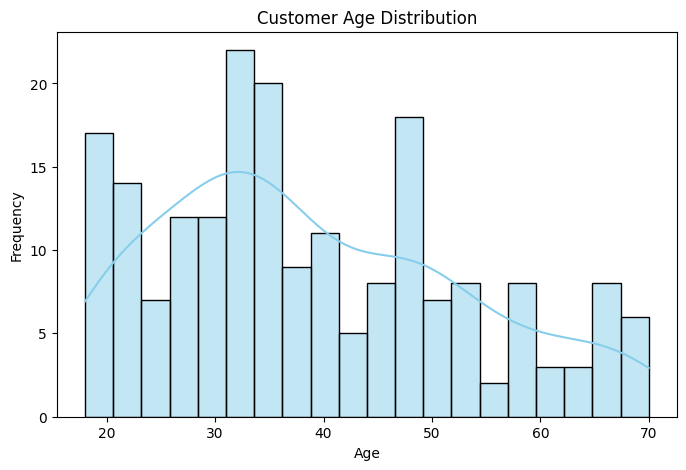

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("images/customer_age_distribution.png")
plt.show()

# Annual Income vs. Spending Score Scatter Plot

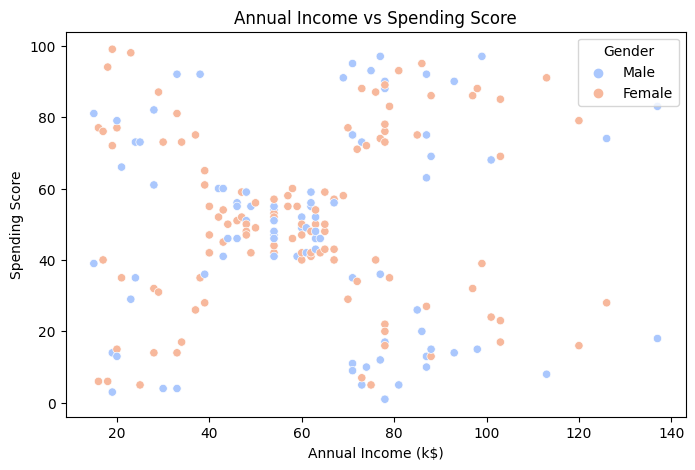

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Genre"], palette="coolwarm")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Gender")
plt.savefig("images/annual_income_vs_spending_score.png")
plt.show()

# Determining the Number of Clusters (Elbow Method)

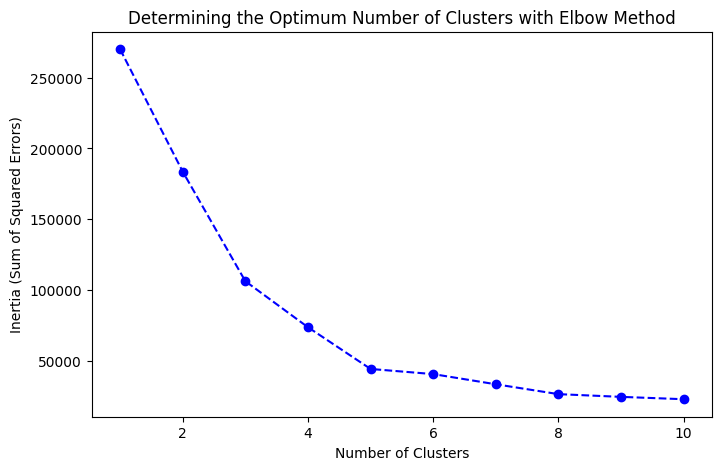

In [18]:
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  

# use only income and spending score
X = df.iloc[:, [3, 4]].values  

# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Errors)")
plt.title("Determining the Optimum Number of Clusters with Elbow Method")
plt.savefig("images/k_means_elbow_method.png")
plt.show()

# Training and Clustering with the K-Means Model

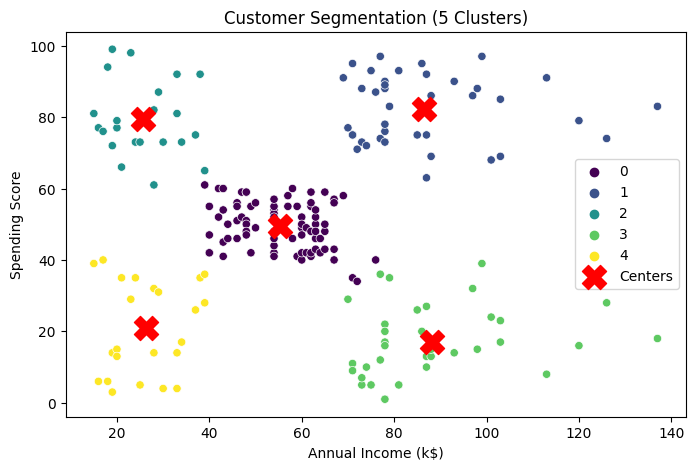

In [19]:
# Train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X)  # Get cluster labels

# Add cluster labels to the DataFrame
df["Cluster"] = clusters  

# Visualize the clustering result
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="red", marker="X", label="Centers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation (5 Clusters)")
plt.legend()
plt.savefig("images/customer_segmentation.png")
plt.show()

# Examining Cluster Averages

In [20]:
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


C:\Users\ozang\AppData\Local\Temp\ipykernel_28116\1049456043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby("Cluster").mean()


# Analysis

Cluster 0 → Middle-Income, Moderate Spending

This segment includes middle-aged customers with moderate income and spending habits. They are stable, loyal clients who are likely to engage with long-term loyalty programs. This group represents a key demographic for consistent revenue and can be retained with targeted offers and rewards.

------------------------------------------------------------------------------

Cluster 1 → VIP Customers (Wealthy, High Spending)

This cluster consists of younger to middle-aged customers with high income and spending scores. They exhibit significant purchasing power and can be attracted with exclusive luxury services, personalized experiences, and tailored promotional campaigns that cater to their elevated needs and preferences.

------------------------------------------------------------------------------

Cluster 2 → Young and Low Income, Yet High-Spending Potential

Younger customers in this group have lower income levels but demonstrate a strong inclination towards spending. They are likely to be interested in student discounts, value-driven offers, and campaigns that specifically target younger audiences with cost-effective yet appealing products.

------------------------------------------------------------------------------

Cluster 3 → High-Income, Low-Spending (The Savers)

This segment represents high-income individuals who show limited spending behaviors. These customers may be inclined to invest in premium products, exclusive investment opportunities, or luxury services that appeal to their financial security and desire for high-value, long-term purchases.

------------------------------------------------------------------------------

Cluster 4 → Low-Income, Low Spenders (Frugal Customers)

This group includes middle-aged individuals with low income and minimal spending habits. They are highly cost-conscious and would respond best to discounted products, value-driven offers, and economical packages that align with their financial constraints.